# Algebra of subgraphs

In [1]:
using Catlab.Graphs, Catlab.Graphics
using Catlab.Theories, Catlab.CategoricalAlgebra

A *subgraph* of a graph $G$ is a monomorphism $A \rightarrowtail G$. Because
the category of graphs is a presheaf topos, its subobjects have a rich
algebraic structure, which we will explore in this vignette.

Throughout the vignette, we will work with subgraphs of the following graph.

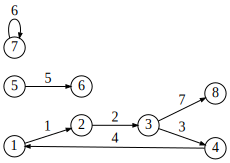

In [2]:
G = cycle_graph(Graph, 4) ⊕ path_graph(Graph, 2) ⊕ cycle_graph(Graph, 1)
add_edge!(G, 3, add_vertex!(G))

to_graphviz(G, node_labels=true, edge_labels=true)

## Meet and join

The basic operations of [meet](https://ncatlab.org/nlab/show/meet) or
intersection ($\wedge$), [join](https://ncatlab.org/nlab/show/join) or union
($\vee$), [top](https://ncatlab.org/nlab/show/top) or maximum ($\top$),
[bottom](https://ncatlab.org/nlab/show/bottom) or minimum ($\bot$) are all
computed pointwise: separately on vertices and edges.

Consider the following two subgraphs.

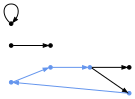

In [3]:
(A = Subobject(G, V=1:4, E=[1,2,4])) |> to_graphviz

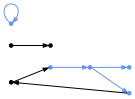

In [4]:
(B = Subobject(G, V=[2,3,4,7,8], E=[2,3,6,7])) |> to_graphviz

The *join* is defined as left adjoint to the diagonal, making it the *least
upper bound*:

$$A \vee B \leq C \qquad\text{iff}\qquad A \leq C \text{ and } B \leq C.$$

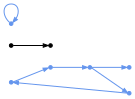

In [5]:
A ∨ B |> to_graphviz

Dually, the *meet* is defined as right adjoint to the diagonal, making it the
*greatest lower bound*:

$$C \leq A \text{ and } C \leq B \qquad\text{iff}\qquad C \leq A \wedge B.$$

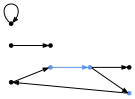

In [6]:
A ∧ B |> to_graphviz

## Implication and negation

The other operations, beginning with implication ($\Rightarrow$) and negation
($\neg$) are more interesting because they do not have pointwise formulas.

*Implication* is defined as the right adjoint to the meet:

$$C \wedge A \leq B \qquad\text{iff}\qquad C \leq A \Rightarrow B.$$

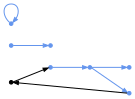

In [7]:
(A ⟹ B) |> to_graphviz

*Negation* is defined by setting $B = \bot$ in the above formula:

$$C \wedge A = \bot \qquad\text{iff}\qquad C \leq \neg A.$$

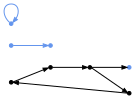

In [8]:
¬A |> to_graphviz

### Induced subgraph as a double negation

The logic of subgraphs, and of subobjects in presheaf toposes generally, is
not classical. Specifically, subobjects form a [Heyting
algebra](https://ncatlab.org/nlab/show/Heyting+algebra) but not a [Boolean
algebra](https://ncatlab.org/nlab/show/Boolean+algebra). This means that the
law of excluded middle does not hold: in general, $\neg \neg A \neq A$.

Applying the double negation to a discrete subgraph gives the subgraph induced
by those vertices.

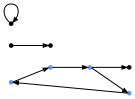

In [9]:
(C = Subobject(G, V=1:4)) |> to_graphviz

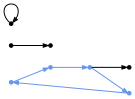

In [10]:
¬(¬C) |> to_graphviz

## Subtraction and non

The subojects also form [co-Heyting
algebra](https://ncatlab.org/nlab/show/co-Heyting+algebra) and hence a
bi-Heyting algebra.

*Subtraction* is defined dually to implication as the left adjoint to the
join:

$$A \leq B \vee C \qquad\text{iff}\qquad A \setminus B \leq C.$$

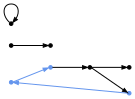

In [11]:
(A \ B) |> to_graphviz

*Non* is defined by setting $A = \top$ in the above formula:

$$\top = B \vee C \qquad\text{iff}\qquad {\sim} B \leq C.$$

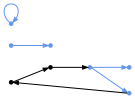

In [12]:
~A |> to_graphviz

### Boundary via non

A [*boundary*](https://ncatlab.org/nlab/show/co-Heyting+boundary) operator can
be defined using the non operator:

$$\partial A := A \wedge {\sim} A.$$

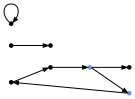

In [13]:
(A ∧ ~A) |> to_graphviz